In [1]:
import pandas as pd 
import cnmaps
import numpy as np
from shapely.geometry import Point
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cnmaps import get_adm_maps,draw_maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
provincelist=['广西壮族自治区','广东省','福建省','浙江省','江苏省','上海市','山东省','辽宁省','海南省','台湾省']
filepath=glob.glob(r'D:\WORKcode\pythoncode\ncdata\typath\CMA_csv\*')

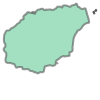

In [3]:
# 海南省去除三沙市
a=get_adm_maps(province='海南省',level='市',only_polygon=True)
hainan=a[0]
for i in a[1:]:
    if a.index(i) ==2 :
        continue
    hainan+=i
hainan

# 存放登陆点的数组2.5°*2。5°
# lon 70-135 lat 17.5-57.5
dengluarray=np.zeros((16,26))
#
latlist=[]
lonlist=[]
# 字典计数器 记录各省台风的登陆个数
# countdict={}
for i in filepath:
    # print(i[-8:-4])
    if int(i[-8:-4]) not in np.arange(2003,2020,1):
        continue
    print(i[-8:-4])
    # countdict[str(i[-8:-4])]={}
    # # 计数器初始化
    # for province_i in provincelist:
    #     countdict[str(i[-8:-4])][province_i]=0
    df=pd.read_excel(i)
    # 去除重复的名字
    namelist=df['name_en'].drop_duplicates().reset_index()['name_en']
    for name_i in namelist:
        # if name_i=='(nameless)':
        #     continue
        temp=df[df['name_en']==name_i]
        out_proviceloop=False
        '''判断这个台风在那个省份登陆，循环判断'''
        out_proviceloop=False
        for province_i in provincelist:
            # 把这个省份(区)的区域调出来
            if (province_i =="海南省") or (province_i =="台湾省"):
                out_proviceloop=False
            if out_proviceloop:
                '''如果台风已经判断在哪里登陆了，开始下一个'''
                continue
            if province_i=='海南省':
                Pmap=hainan
            else:
                Pmap=cnmaps.get_adm_maps(province=province_i,engine='geopandas',only_polygon=False)['geometry'][0]
            for lat_i,lon_i in zip(temp['lat'],temp['lon']):
                '''判断这个台风的这个点是否在省(区)的区域内,如果是计数器加一,继续下一循环,以此类推,直到所有'''
                if Pmap.contains(Point(lon_i,lat_i)):
                    # countdict[str(i[-8:-4])][province_i]+=1
                    # 
                    latlist.append(lat_i)
                    lonlist.append(lon_i)
                    '''如果该登陆点位于dengluarray的一个点所代表的区域上,则dengluarray这个点加一'''
                    lon_n=int(np.floor((lon_i-70)/2.5))
                    lat_n=int(np.floor((lat_i-17)/2.5))
                    dengluarray[lat_n,lon_n]+=1
                    # print(lon_i,lat_i)
                    out_proviceloop=True
                    break


In [7]:
dengluarray=np.zeros((16,26))
denglulist=[(107.5,20),(107.5,17.5),(110,17.5),(110,20),(112.5,20),(112.5,22.5),(115,22.5),(117.5,22.5),(120,22.5),(120,20),(117.5,25),(120,25),(120,27.5),(120,30),(122.5,30),(120,32.5),(117.5,32.5),(120,35),(122.5,37.5)]
for i in filepath:
    if int(i[-8:-4]) not in np.arange(2003,2020,1):
        continue
    print(i[-8:-4])
    df=pd.read_excel(i)
    # 去除重复的名字
    namelist=df['name_en'].drop_duplicates().reset_index()['name_en']
    for name_i in namelist:
        temp=df[df['name_en']==name_i]
        for lu_i in denglulist: 
            count=0
            for lon_i,lat_i in zip(temp['lon'],temp['lat']):
                lon_n=int(np.floor((lon_i-70)/2.5))
                lat_n=int(np.floor((lat_i-17.5)/2.5))
                if (70+2.5*lon_n,17.5+2.5*lat_n)==lu_i:
                    count+=1
                    if count==1:
                        dengluarray[lat_n,lon_n]+=1
                    else:
                        break

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [5]:
# # 存储为csv
# df1=pd.DataFrame.from_dict(countdict)
# df1

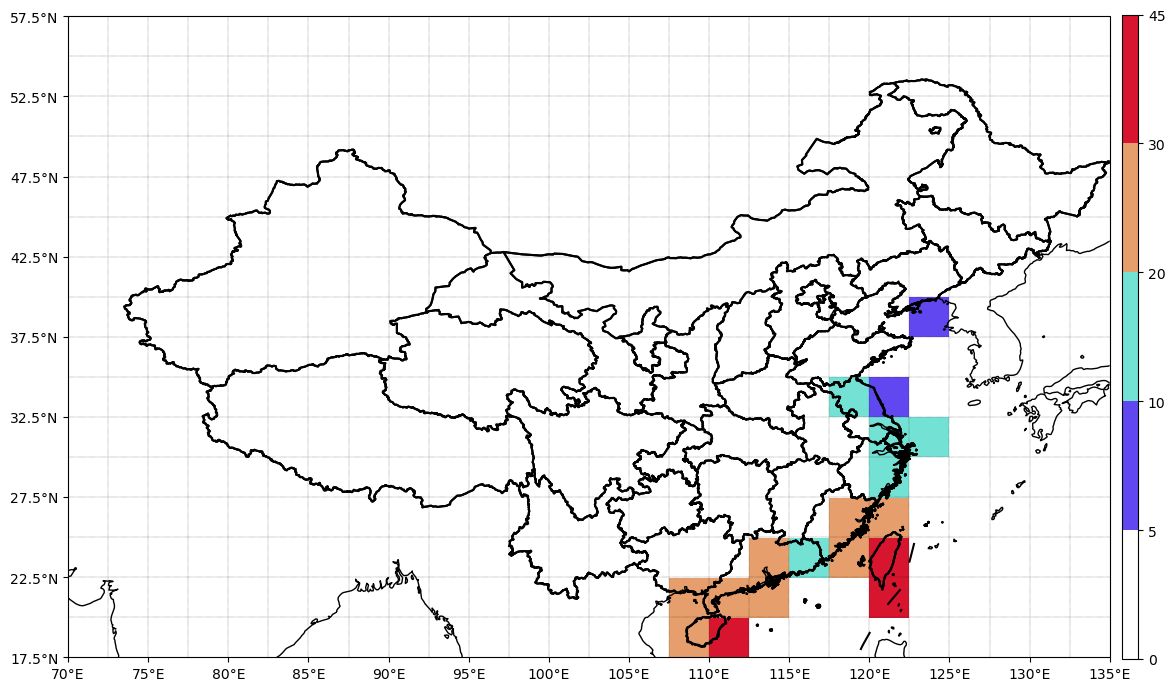

In [8]:
box1 = [70, 135, 17.5, 55]
box2 = [105, 125, 0, 25]
xstep=5
ystep=5
fig=plt.figure(figsize=(16,9))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=110)})
ax.coastlines("50m")
draw_maps(get_adm_maps(level='国'))
draw_maps(get_adm_maps(level='省'))
# colors=['#74E3DD','#ACBF67','#43668B','#07078F','#C810C5','#159ED0','#6BECB9','#076ADC','#55D873','pink']
# provincelist=['广西壮族自治区','广东省','海南省','福建省','台湾省','浙江省','江苏省','上海市','山东省','辽宁省']
# for i,j in zip(colors,provincelist):
#     GX=get_adm_maps(province=j,only_polygon=True)
#     ax.add_geometries(GX,crs=ccrs.PlateCarree(),facecolor=i)
# 坐标轴
## 标注坐标轴
ax.set_extent(box1,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(box1[0], box1[1] + 5, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box1[2], box1[3] + 5, 5), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.gridlines(xlocs=np.arange(box1[0], box1[1] + 2.5, 2.5), ylocs=np.arange(box1[2], box1[3] + 2.5, 2.5), linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# # 南海子图
# ax2 = fig.add_axes([0.76, 0.08, 0.1, 0.3], projection=ccrs.PlateCarree())
# ax2.coastlines('50m')
# ax2.set_extent(box2, crs=ccrs.PlateCarree())
# draw_maps(get_adm_maps(level='国'))
# draw_maps(get_adm_maps(level='省'))
# for i,j in zip(lonlist,latlist):
#     plt.text(i,j,'+',color='r',transform=ccrs.PlateCarree())
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm 
newcmap=ListedColormap(['white','#6147f0','#73e1d4','#e69e6c','#d8152f'],name='from_list')
colorbar=ax.pcolor(np.arange(71.25,136.25,2.5),np.arange(18.75,58.75,2.5),dengluarray,norm=BoundaryNorm(boundaries=[0,5,10,20,30,45],ncolors=5),cmap=newcmap,transform=ccrs.PlateCarree())
cb=plt.colorbar(colorbar,shrink=0.93,aspect=40,pad=0.01)
# cb.set_ticks([0,2,4,6,8,10])
# cb.set_ticklabels(('0','2','4','6','8','10'))
# for i,j in zip(['#74E3DD','#ACBF67','#43668B','#C810C5','#07078F'],['广西壮族自治区','广东省','海南省','台湾省','福建省']):
#     GX=get_adm_maps(province=j,only_polygon=True)
#     ax2.add_geometries(GX,crs=ccrs.PlateCarree(),facecolor=i)
plt.savefig('TydengluPlot.png',dpi=500)